In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pmdarima as pm

In [2]:
tseries = pd.read_csv("monthly_sales_queensland.csv", header = 0, parse_dates = ["date"], index_col = 0)

In [3]:
tseries

,sales
date,
1987-01-01,1664.81
1987-02-01,2397.53
1987-03-01,2840.71
1987-04-01,3547.29
1987-05-01,3752.96
...,...
1992-08-01,19888.61
1992-09-01,23933.38
1992-10-01,25391.35


In [4]:
tseries.index.min(), tseries.index.max()

(Timestamp('1987-01-01 00:00:00'), Timestamp('1992-12-01 00:00:00'))

In [5]:
tseries.index.max() - tseries.index.min()

Timedelta('2161 days 00:00:00')

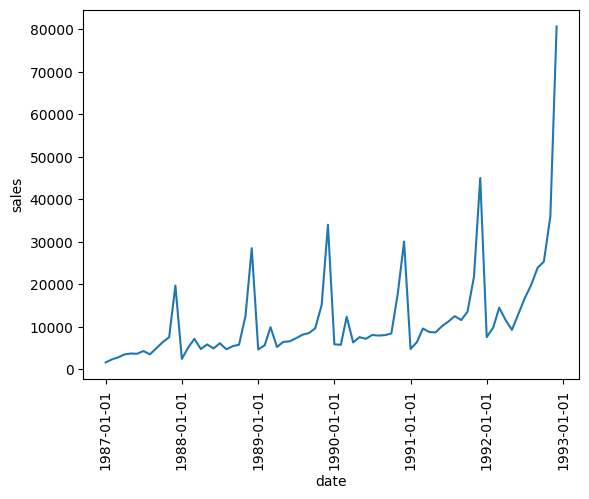

In [6]:
fig, ax = plt.subplots()
ax.plot(tseries["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='months'>

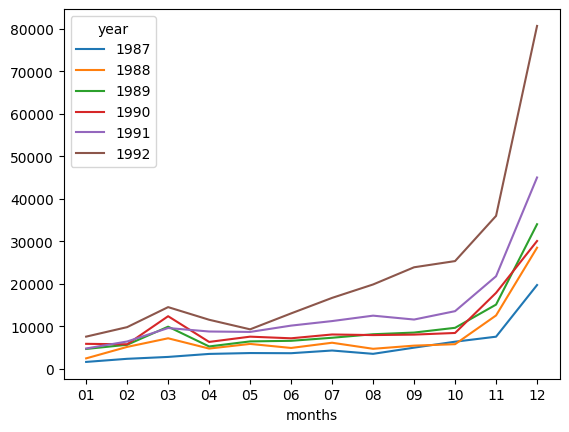

In [7]:
df_years = tseries.copy(deep = True)
df_years.reset_index(inplace = True)
df_years["year"] = pd.to_datetime(df_years["date"]).dt.year
df_years["date"] = pd.to_datetime(df_years["date"]).dt.strftime("%m")
unstacked = df_years.set_index(["year", "date"])["sales"].unstack(-2)
unstacked.plot(xlabel = "months", xticks = pd.Series(range(0,12)))

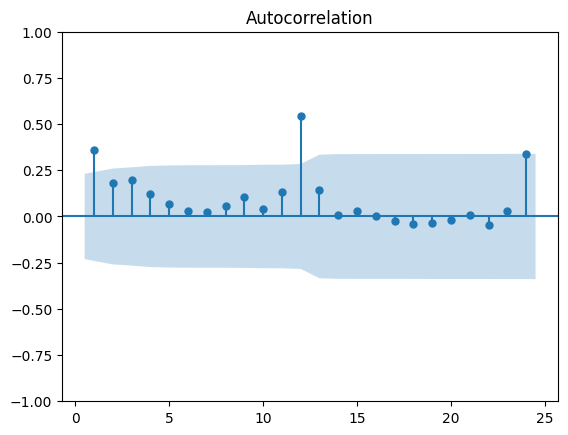

In [8]:
plot_acf(tseries["sales"], lags = 24, zero = False);

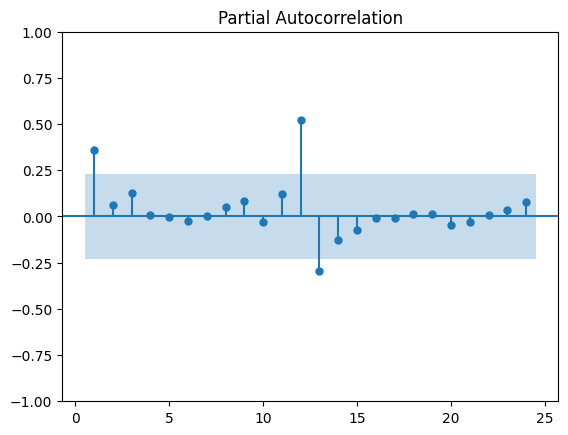

In [9]:
plot_pacf(tseries["sales"], lags = 24, zero = False, method = "ywm");

In [10]:
adfuller(tseries["sales"])

(2.4588875832659216,
 0.9990353814133549,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1152.601255771056)

In [11]:
kpss(tseries["sales"])

C:\Users\giova\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(0.9887885592096786,
 0.01,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [235]:
tseries_novar = tseries.copy(deep = True)
bc = boxcox(tseries["sales"])[0]
lmbda = boxcox(tseries["sales"])[1]
tseries_novar["sales"] = bc

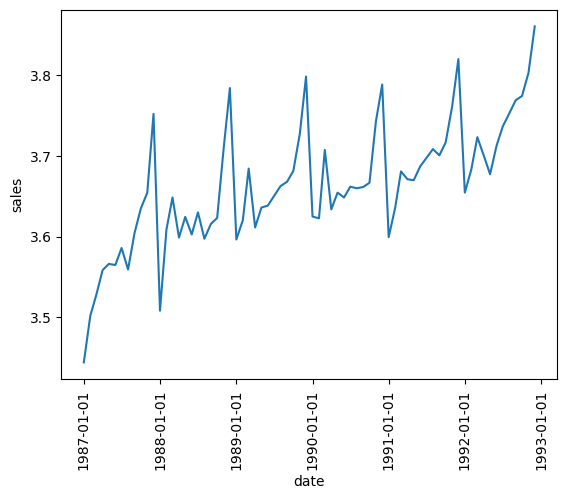

In [236]:
fig, ax = plt.subplots()
ax.plot(tseries_novar["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()

In [237]:
tseries_diff = tseries_novar.copy(deep = True)
tseries_diff["sales"] = tseries_diff["sales"].diff(periods = 1)
tseries_diff = tseries_diff.iloc[1:]
tseries_diff

,sales
date,
1987-02-01,0.057891
1987-03-01,0.025229
1987-04-01,0.031510
1987-05-01,0.007729
1987-06-01,-0.001396
...,...
1992-08-01,0.016046
1992-09-01,0.016463
1992-10-01,0.005105


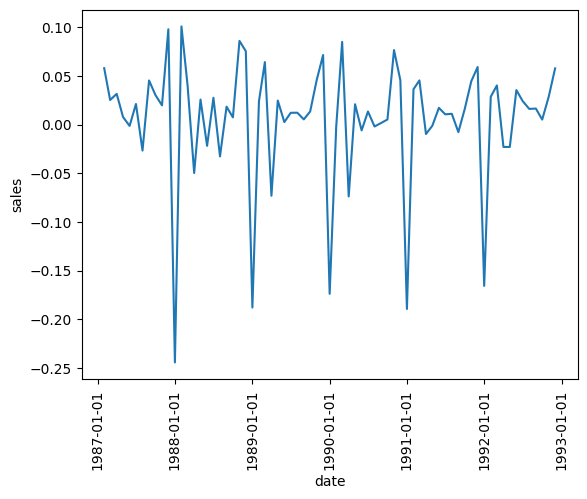

In [22]:
fig, ax = plt.subplots()
ax.plot(tseries_diff["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()

In [24]:
tseries_diff_s = tseries_novar.copy(deep = True)
tseries_diff_s["sales"] = tseries_diff_s["sales"].diff(periods = 12)
tseries_diff_s = tseries_diff_s.iloc[12:]
tseries_diff_s

,sales
date,
1988-01-01,0.064202
1988-02-01,0.107133
1988-03-01,0.121736
1988-04-01,0.040426
1988-05-01,0.058380
1988-06-01,0.037900
1988-07-01,0.044232
1988-08-01,0.038239
1988-09-01,0.011337


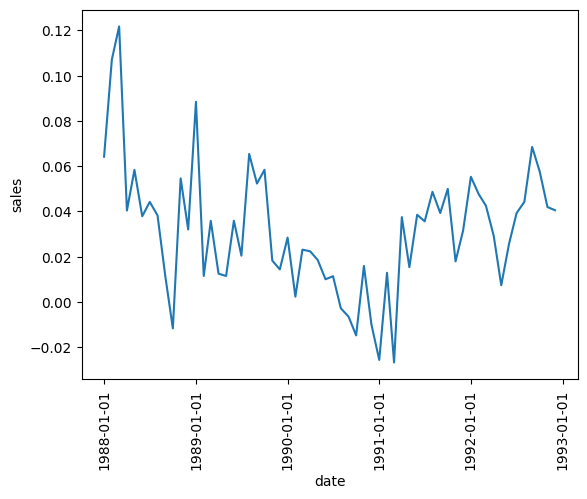

In [25]:
fig, ax = plt.subplots()
ax.plot(tseries_diff_s["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()

In [30]:
tseries_diff_final = tseries_novar.copy(deep = True)
tseries_diff_final["sales"] = tseries_diff_final["sales"].diff(periods = 1).diff(periods = 12)
tseries_diff_final = tseries_diff_final.iloc[13:]
tseries_diff_final

,sales
date,
1988-02-01,0.042931
1988-03-01,0.014603
1988-04-01,-0.081310
1988-05-01,0.017954
1988-06-01,-0.020480
1988-07-01,0.006332
1988-08-01,-0.005994
1988-09-01,-0.026901
1988-10-01,-0.022960


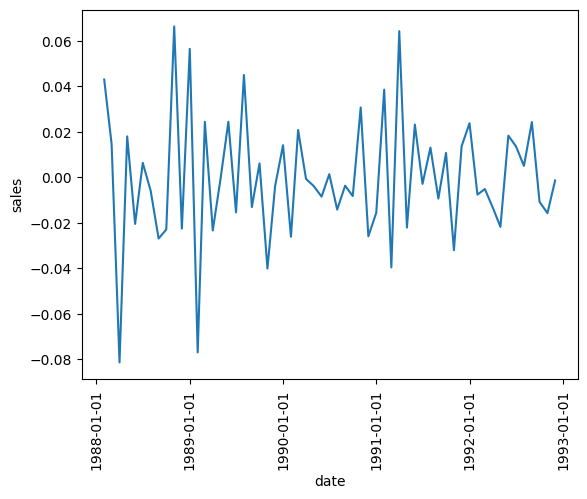

In [31]:
fig, ax = plt.subplots()
ax.plot(tseries_diff_final["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()

In [34]:
adfuller(tseries_diff_final["sales"])

(-5.903726178997968,
 2.73961678960973e-07,
 3,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 -234.49533536833405)

In [35]:
kpss(tseries_diff_final["sales"])

C:\Users\giova\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.02613487681632163,
 0.1,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

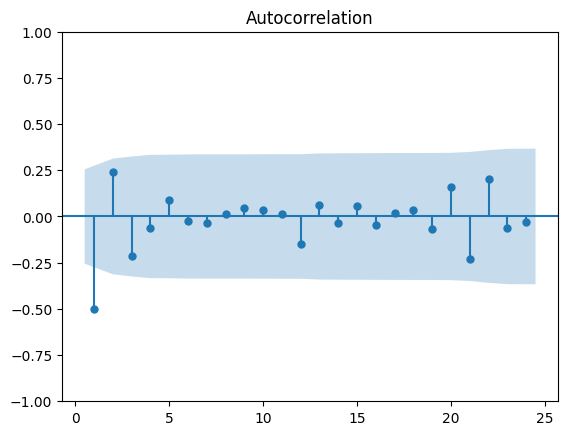

In [36]:
plot_acf(tseries_diff_final["sales"], lags = 24, zero = False);

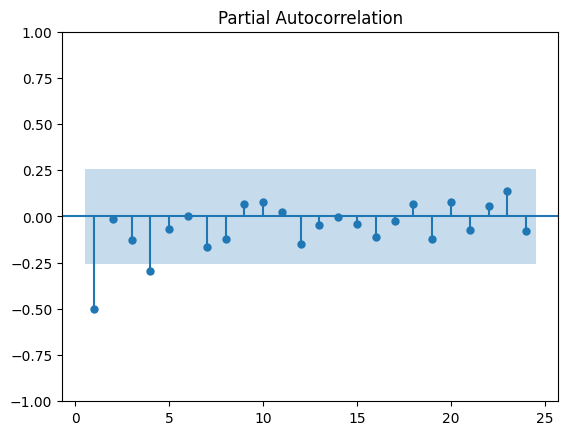

In [38]:
plot_pacf(tseries_diff_final["sales"], lags = 24, zero = False, method = "ywm");

In [208]:
stepwise_fit = pm.auto_arima(tseries_novar, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12,
                             start_P = 0, seasonal = True, d = 1, D = 1, trace = True,
                             error_action = "ignore",
                             suppress_warnings = True,
                             stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-269.383, Time=0.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-251.964, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-269.841, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-269.740, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-267.544, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-268.583, Time=0.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-269.956, Time=0.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-271.244, Time=0.17 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=-269.821, Time=0.33 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=-267.700, Time=1.27 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-252.302, Time=0.28 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-269.369, Time=0.50 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=-267.667, Time=0.61 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=-269.622, Time=0.36 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 138.622
Date:                              Thu, 04 May 2023   AIC                           -271.244
Time:                                      18:26:34   BIC                           -265.011
Sample:                                  01-01-1987   HQIC                          -268.811
                                       - 12-01-1992                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5521      0.124     -4.442      0.000      -0.796      -0.308
ma.S.L12      -0.4516      0.181     -2.493      0.013      -0.807      -0.097
sigma2         0.0005      0.000      4.347      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.99   Prob(JB):                         0.99
Heteroskedasticity (H):               0.30   Skew:                            -0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

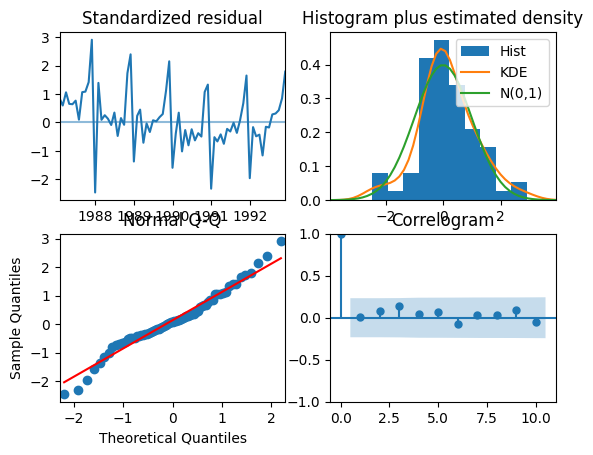

In [81]:
fit.plot_diagnostics();

In [242]:
forecast = fit.predict(n_periods = 12)
df_forecast = pd.DataFrame({"sales": forecast.values})
df_forecast["sales"] = inv_boxcox(df_forecast["sales"], lmbda)
df_forecast.set_index(forecast.index, inplace = True)
df_forecast.index.name = "date"
tseries_forecast = pd.concat([tseries, df_forecast])
tseries_forecast

,sales
date,
1987-01-01,1664.810000
1987-02-01,2397.530000
1987-03-01,2840.710000
1987-04-01,3547.290000
1987-05-01,3752.960000
...,...
1993-08-01,28519.935166
1993-09-01,29527.473078
1993-10-01,30539.968452


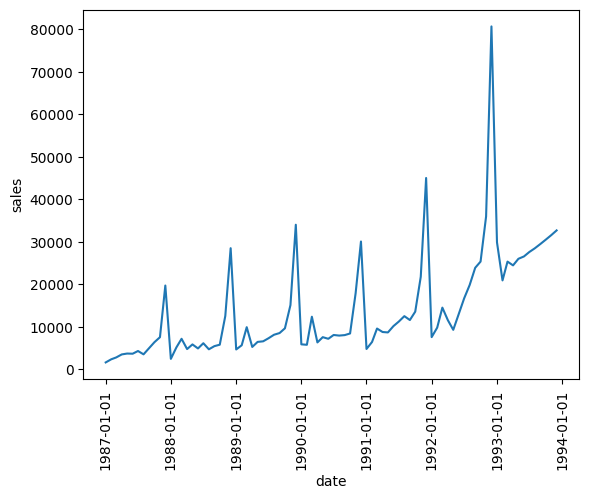

In [243]:
fig, ax = plt.subplots()
ax.plot(tseries_forecast["sales"])
ax.set_xlabel("date")
ax.set_ylabel("sales")
ax.set_xticks(ax.get_xticks()[1::1])
plt.xticks(rotation = 90)
plt.show()